# Combine multiple subsequent Runs NetCDF into One with all outputsteps
* [Reading multi-file datasets](https://xarray.pydata.org/en/stable/combining.html#combining-multi)
* [Parallel computing with Dask](https://xarray.pydata.org/en/stable/dask.html)
* [xarray Concatenate](https://xarray.pydata.org/en/stable/combining.html#concatenate)

## Todo
* Apply ufunc?

In [1]:
import datashader as ds
import numpy as np
import xarray as xr
import hvplot.xarray
import hvplot.dask  # noqa
import numpy as np
import holoviews as hv

from holoviews import opts
from holoviews.operation.datashader import datashade, rasterize #
from holoviews.operation import decimate
from gridded.pysgrid.processing_2d import vector_sum

In [19]:
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [1]:
# help(xr.open_mfdataset)

In [4]:
# results_folder = '/Users/julesblom/ThesisResults/5050_single_slope/Slope1.50/Run*.nc'
results_folder = '/Volumes/Seagate Expansion Drive/ThesisResults/5050_single_slope/Slope1.50/Run*.nc'

In [6]:
combined = xr.open_mfdataset(results_folder, concat_dim="time", chunks={'time': 10}, #parallel=True, # engine=h5netcdf,
                  data_vars='minimal', coords='minimal', compat='override', combine='nested')

ValueError: 'S1' is not present in all datasets.

In [6]:
# trim = xr.open_mfdataset(results_folder, dim='time') #', parallel=True

In [20]:
combined.dims['time']

364

In [17]:
# remake mesh grid to plot because delft3d cuts gridmesh values outside of enclosure out causing hvplot to go haywire
x_gridstep = 300 # [m]
y_gridstep = 300 # [m]

# Grid dimensions
length = 60000 # y [m]
width = 18000 # x [m]
    
firstcenter = int(x_gridstep/2)
xList = [0] + [i for i in range(firstcenter, width + 1 * x_gridstep, x_gridstep)] #prepend a zero
yList = [i for i in range(-50, length + 1 * y_gridstep, y_gridstep)]

# xList = np.array([i for i in range(0, width + 2 * x_gridstep, x_gridstep)])
# yList = np.array([i for i in range(0, length + 2 * y_gridstep, y_gridstep)]) + 100 # Not sure what the + 100 is for but its necessary

xDim, yDim = [len(xList), len(yList)]
# print(xDim, "x", yDim, "grid")

XZ, YZ = np.meshgrid(xList, yList)

print('XZ', XZ.T.shape)
print('YZ', YZ.T.shape)

# So hvplot has a proper meshgrid
combined.XZ.values = XZ.T
combined.YZ.values = YZ.T

XZ (62, 202)
YZ (62, 202)


In [9]:
# # use u_func
# def magnitude(a, b):
#     # func = lambda x, y: np.sqrt(x ** 2 + y ** 2)
#     return xr.apply_ufunc(vector_sum, a, b, dask='parallelized', output_dtypes=['float'])
# # You can now apply magnitude() to xr.DataArray 

### Make velocity DataArray

In [10]:
# https://xarray.pydata.org/en/stable/generated/xarray.apply_ufunc.html#xarray.apply_ufunc
# combined_velo = magnitude(combined.U1.values, combined.V1.values)
# combined_velo.isel(time=20)
# input_core_dims=

In [11]:
# isel(1,-1,10)

In [ ]:
velocity_sum = vector_sum(combined.U1.values, combined.V1.values) # Velocity per layer
combined['velocity'] = (combined.RHO.dims, velocity_sum)
combined['velocity'].attrs = {'long_name': 'Velocity per layer', 'units': 'm/s', 'grid': 'grid', 'location': 'edge1'}

### TO FIX: Make bottom stress DataArray

In [ ]:
bottom_stress_sum = vector_sum(combined.TAUKSI.values, combined.TAUETA.values) # Bottom stress
combined['bottom_stress'] = (('time', 'M', 'N'), bottom_stress_sum)
combined['bottom_stress'].attrs = {'long_name': 'Bottom stress', 'units': 'N/m2', 'grid': 'grid', 'location': 'edge1'}

In [ ]:
combined.TAUKSI.dims

### Make suspended sand load DataArray

In [21]:
susp_load_sand_v = combined['SSVV'].isel(LSED=0)
susp_load_sand_u = combined['SSUU'].isel(LSED=0)
susp_load_sand_u.dims

('time', 'MC', 'N')

In [22]:
# Suspended load transport
susp_load_sand_sum = vector_sum(susp_load_sand_u.values, susp_load_sand_v.values) # Sus per layer

In [22]:
combined['susp_load_sand'] = (('time', 'M', 'N'), susp_load_sum)
combined['susp_load_sand'].attrs = {'long_name': 'Suspended-load sand transport', 'units': 'm3/(s m)', 'grid': 'grid', 'location': 'edge1'}

NameError: name 'susp_load_sum' is not defined

In [ ]:
combined['susp_load_sand'].dims

### Make suspended silt load DataArray

In [ ]:
susp_load_silt_v = combined['SSVV'].isel(LSED=1)
susp_load_silt_u = combined['SSUU'].isel(LSED=1)
susp_load_silt_u.dims

In [29]:
# Suspended load transport
susp_load_silt_sum = vector_sum(susp_load_silt_u.values, susp_load_sand_v.values) # Sus per layer
combined['susp_load_silt'] = (('time', 'M', 'N'), susp_load_silt_sum)
combined['susp_load_silt'].attrs = {'long_name': 'Suspended-load silt transport', 'units': 'm3/(s m)', 'grid': 'grid', 'location': 'edge1'}

### Make accumulated sediment DataArray

In [32]:
combined['acc_sediment'] = combined.DPS.isel(time=0) - combined.DPS

In [33]:
combined['acc_sediment']
# combined.velocity

<xarray.DataArray 'acc_sediment' (M: 62, N: 202, time: 364)>
dask.array<sub, shape=(62, 202, 364), dtype=float32, chunksize=(62, 202, 10), chunktype=numpy.ndarray>
Coordinates:
    XZ       (M, N) int64 0 0 0 0 0 0 0 ... 18150 18150 18150 18150 18150 18150
    YZ       (M, N) int64 -50 250 550 850 1150 ... 59050 59350 59650 59950 60250
  * time     (time) datetime64[ns] 2018-10-02 ... 2018-10-03T12:00:00
Dimensions without coordinates: M, N

# Plot interactive

In [11]:
opts.defaults(opts.QuadMesh(fig_inches=(5, 15), cmap='viridis', colorbar=True, aspect=0.3))

# Suspended load transport

/Users/julesblom/.local/share/virtualenvs/ThesisPython-OwMgd5UG/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/Users/julesblom/.local/share/virtualenvs/ThesisPython-OwMgd5UG/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  colorbar.set_clim(artist.get_clim())


:DynamicMap   [time]
   :QuadMesh   [XZ,YZ]   (susp_load_sand)
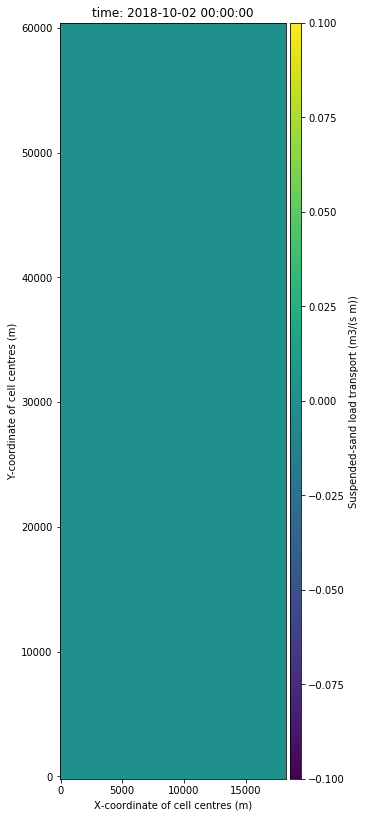

In [18]:
hv_susp_load_sand = rasterize(hv.Dataset(combined['susp_load_sand'])
susp_load_sand_plot = hv_susp_load_sand.to(hv.QuadMesh, ["XZ", "YZ"], dynamic=True)\
    .opts(opts.QuadMesh(cmap='viridis', fig_inches=(5, 15), #width=170, height=1200,
                        colorbar=True, aspect=0.3, #clim=(1025, 1030)
                       )\
         )

susp_load_sand_plot
# rasterize(density_plot) # datashaded for performance

## Density mapview

In [14]:
hv_density = hv.Dataset(combined.RHO)

/Users/julesblom/.local/share/virtualenvs/ThesisPython-OwMgd5UG/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/Users/julesblom/.local/share/virtualenvs/ThesisPython-OwMgd5UG/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  colorbar.set_clim(artist.get_clim())


:DynamicMap   [KMAXOUT_RESTR,time]
   :QuadMesh   [XZ,YZ]   (RHO)
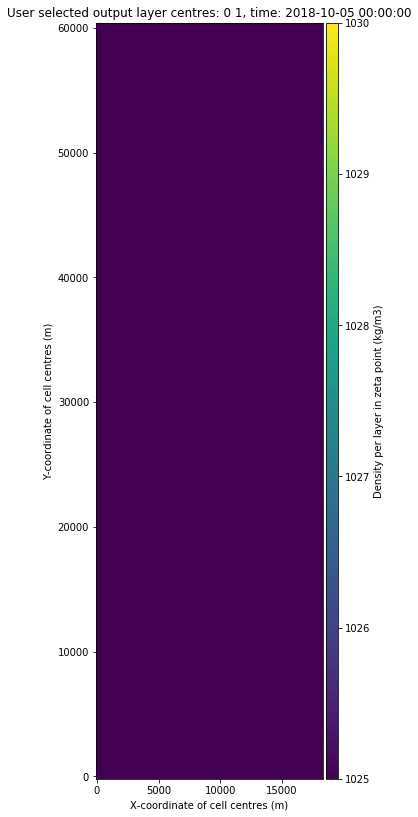

In [15]:
density_plot = hv_density.to(hv.QuadMesh, ["XZ", "YZ"], dynamic=True)\
    .opts(opts.QuadMesh(cmap='viridis', fig_inches=(5, 15), #width=170, height=1200,
                        colorbar=True, aspect=0.3, clim=(1025, 1030)
                       )\
         )


density_plot
# rasterize(density_plot) # datashaded for performance

# Animations

In [23]:
import warnings
renderer = hv.renderer('matplotlib')
warnings.simplefilter('ignore')

## Density

In [24]:
density_selection = combined.RHO.isel(time=slice(0, -1, 5), KMAXOUT_RESTR=78)
density_selection

<xarray.DataArray 'RHO' (time: 73, M: 62, N: 202)>
dask.array<getitem, shape=(73, 62, 202), dtype=float32, chunksize=(2, 62, 202), chunktype=numpy.ndarray>
Coordinates:
    XZ             (M, N) int64 0 0 0 0 0 0 ... 18150 18150 18150 18150 18150
    YZ             (M, N) int64 -50 250 550 850 1150 ... 59350 59650 59950 60250
    KMAXOUT_RESTR  int32 78
  * time           (time) datetime64[ns] 2018-10-02 ... 2018-10-03T11:42:00
Dimensions without coordinates: M, N
Attributes:
    long_name:  Density per layer in zeta point
    units:      kg/m3
    grid:       grid
    location:   face

In [25]:
hv_dens_animate_set = hv.Dataset(density_selection)
# rasterize() opts
density_animation = hv_dens_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', cmap='viridis', fig_inches=(5.5, 12), clim=(1025,1050), colorbar=True, aspect=0.3)

density_animation

hv.output(density_animation, holomap='mp4', fps=5)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (RHO)

## Velocity

In [20]:
velocity_selection = combined.velocity.isel(time=slice(0, -1, 3), KMAXOUT_RESTR=79)
# velocity_selection

In [21]:
hv_velo_animate_set = hv.Dataset(velocity_selection)
velocity_animation = hv_velo_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), cmap='inferno', clim=(0,2.5), colorbar=True, aspect=0.3)
velocity_animation

hv.output(velocity_animation, holomap='mp4', fps=5)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (velocity)

## Concentration Sand

In [30]:
combined.NAMCON.isel(LSTSCI=0).values

array(b'Sediment vfsand     ', dtype='|S20')

In [31]:
combined.R1

<xarray.DataArray 'R1' (time: 364, LSTSCI: 2, KMAXOUT_RESTR: 80, M: 62, N: 202)>
dask.array<concatenate, shape=(364, 2, 80, 62, 202), dtype=float32, chunksize=(10, 2, 80, 62, 202), chunktype=numpy.ndarray>
Coordinates:
    XZ             (M, N) int64 0 0 0 0 0 0 ... 18150 18150 18150 18150 18150
    YZ             (M, N) int64 -50 250 550 850 1150 ... 59350 59650 59950 60250
  * KMAXOUT_RESTR  (KMAXOUT_RESTR) int32 0 1 2 3 4 5 6 ... 73 74 75 76 77 78 79
  * time           (time) datetime64[ns] 2018-10-02 ... 2018-10-03T12:00:00
Dimensions without coordinates: LSTSCI, M, N
Attributes:
    long_name:  Concentrations per layer in zeta point
    units:      1
    grid:       grid
    location:   face

In [27]:
# hv_concentration = hv.Dataset(combined.R1.isel(LSTSCI=0))
concentration_selection = combined.R1.isel(time=slice(0, -1, 3), LSTSCI=0, KMAXOUT_RESTR=79)

In [28]:
combined.R1.isel(LSTSCI=0, KMAXOUT_RESTR=79).max()

<xarray.DataArray 'R1' ()>
dask.array<nanmax-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    KMAXOUT_RESTR  int32 79

In [43]:
hv_conc_animate_set = hv.Dataset(concentration_selection)
concentration_animation = hv_conc_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), cmap='cividis', clim=(0,3.75), colorbar=True, aspect=0.3)
concentration_animation

hv.output(concentration_animation, holomap='mp4', fps=10)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (R1)

In [44]:
combined.LYRFRAC

<xarray.DataArray 'LYRFRAC' (time: 364, LSEDTOT: 2, nlyr: 77, M: 62, N: 202)>
dask.array<concatenate, shape=(364, 2, 77, 62, 202), dtype=float32, chunksize=(10, 2, 77, 62, 202), chunktype=numpy.ndarray>
Coordinates:
    XZ       (M, N) int64 0 0 0 0 0 0 0 ... 18150 18150 18150 18150 18150 18150
    YZ       (M, N) int64 -50 250 550 850 1150 ... 59050 59350 59650 59950 60250
  * time     (time) datetime64[ns] 2018-10-02 ... 2018-10-03T12:00:00
Dimensions without coordinates: LSEDTOT, nlyr, M, N
Attributes:
    long_name:  Volume fraction of sediment in layer
    units:      1
    grid:       grid
    location:   face

In [54]:
# hv_concentration = hv.Dataset(combined.R1.isel(LSTSCI=0))
underlayer_vol_frac_selection = combined.LYRFRAC.isel(time=slice(0, -1, 3), LSEDTOT=0, nlyr=75)

In [55]:
hv_underlayer_vol_frac_set = hv.Dataset(underlayer_vol_frac_selection)

In [57]:
underlayer_vol_frac_animation = hv_underlayer_vol_frac_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), clim=(0.3,0.55), cmap='cividis',  colorbar=True, aspect=0.3)
underlayer_vol_frac_animation 

hv.output(underlayer_vol_frac_animation, holomap='mp4', fps=10)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (LYRFRAC)

## Suspended sand load animation

In [23]:
susp_sand_selection = combined['susp_load_sand'].isel(time=slice(0, -1, 5))

KeyError: 'susp_load_sand'

In [ ]:
hv_susp_sand_set = hv.Dataset(susp_sand_selection)
susp_sand_animation = hv_susp_sand_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), clim=(0,0.2), cmap='plasma', colorbar=True, aspect=0.3) 
susp_sand_animation

hv.output(susp_sand_animation, holomap='mp4', fps=7)

### Suspended silt load animation

In [37]:
susp_silt_selection = combined['susp_load_silt'].isel(time=slice(0, -1, 5))

In [44]:
hv_susp_silt_set = hv.Dataset(susp_silt_selection)
susp_silt_animation = hv_susp_silt_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12),  cmap='plasma', clim=(0,0.2), colorbar=True, aspect=0.3)  
susp_silt_animation

hv.output(susp_silt_animation, holomap='mp4', fps=7)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (susp_load_silt)

## Bottom depth

In [34]:
bottom_depth_selection = combined['acc_sediment'].isel(time=slice(0, -1, 3))
bottom_depth_selection

<xarray.DataArray 'acc_sediment' (M: 62, N: 202, time: 121)>
dask.array<getitem, shape=(62, 202, 121), dtype=float32, chunksize=(62, 202, 4), chunktype=numpy.ndarray>
Coordinates:
    XZ       (M, N) int64 0 0 0 0 0 0 0 ... 18150 18150 18150 18150 18150 18150
    YZ       (M, N) int64 -50 250 550 850 1150 ... 59050 59350 59650 59950 60250
  * time     (time) datetime64[ns] 2018-10-02 ... 2018-10-03T11:42:00
Dimensions without coordinates: M, N

In [36]:
hv_bottom_depth_animate_set = hv.Dataset(bottom_depth_selection)
bottom_depth_animation = hv_bottom_depth_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12),
             clim=(-0.75,0.75), cmap='PiYG',\
             colorbar=True, aspect=0.3)
bottom_depth_animation

hv.output(bottom_depth_animation, holomap='mp4', fps=10)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (acc_sediment)

## Deposits through channel line plot

In [37]:
deposits_through_selection = combined['acc_sediment'].isel(M=31, time=slice(0, -1, 5))
deposits_through_selection

<xarray.DataArray 'acc_sediment' (N: 202, time: 73)>
dask.array<getitem, shape=(202, 73), dtype=float32, chunksize=(202, 2), chunktype=numpy.ndarray>
Coordinates:
    XZ       (N) int64 9150 9150 9150 9150 9150 ... 9150 9150 9150 9150 9150
    YZ       (N) int64 -50 250 550 850 1150 ... 59050 59350 59650 59950 60250
  * time     (time) datetime64[ns] 2018-10-02 ... 2018-10-03T11:42:00
Dimensions without coordinates: N

In [118]:
# hv.help(hv.Curve)

:DynamicMap   [time,XZ]
   :Curve   [YZ]   (acc_sediment)
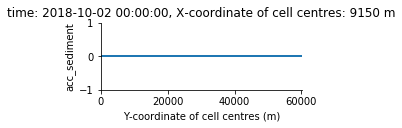

In [38]:
deposits_through_selection.hvplot.line('YZ', 'acc_sediment', height=200, aspect=3)

In [40]:
hv_deposits_through_selection_set = hv.Dataset(deposits_through_selection)
hv_deposits_through_selection_set #,

:Dataset   [time,XZ,YZ]   (acc_sediment)

In [42]:
# deposits_through_selection_animation = hv_deposits_through_selection_set.to(hv.QuadMesh, ['time', 'YZ'])\
#     .options('QuadMesh', fig_inches=(5, 2),  ) #clim=(-2,0.5),
# deposits_through_selection_animation

# # hv.output(deposits_through_selection_animation, holomap='mp4', fps=5)

# Bottom stress

In [78]:
bottom_stress_selection = combined['bottom_stress'].isel(time=slice(0, -1, 10))
print(bottom_stress_selection.isel(time=20).dims)
print(bottom_stress_selection.isel(time=20).shape)

('MC', 'N')
(62, 202)


In [54]:
hv_bottom_stress_animate_set = hv.Dataset(bottom_stress_selection)
bottom_stress_animation = hv_bottom_stress_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), clim=(0,20),\
             cmap='Viridis', colorbar=True, aspect=0.3)
bottom_stress_animation

hv.output(bottom_stress_animation, holomap='mp4', fps=5)

ValueError: QuadMesh kdims must be between length 2 and 2.

# Actual depth plot

In [88]:
import matplotlib.pyplot as plt


In [89]:
actual_depth = combined.SIG_LYR @ combined.DPS

In [97]:
# add non-dimension depth coordinates that depend on time
combined.coords['depth'] = actual_depth
combined.dims

Frozen(SortedKeysDict({'avgtime': 1, 'LSED': 2, 'MC': 62, 'N': 202, 'NC': 202, 'LSEDTOT': 2, 'M': 62, 'LTUR': 2, 'LSTSCI': 2, 'SIG_LYR': 80, 'SIG_INTF': 81, 'KMAXOUT_RESTR': 80, 'KMAXOUT': 81, 'time': 455, 'nlyr': 77, 'nlyrp1': 78}))

In [100]:
z_at_200 = combined['depth'].isel(time = 454, M=31)
z_at_200.dims

('SIG_LYR', 'N')

In [101]:
density_at_200 = combined.RHO.isel(time=454, M=31)
density_at_200.dims

('KMAXOUT_RESTR', 'N')

In [102]:
velocity_at_200 = combined.velocity.isel(time=454, M=31)

In [103]:
density_at_200.YZ.shape

(202,)

In [104]:
z_at_200.shape

(80, 202)

In [105]:
fig_vert, ax_vert = plt.subplots(nrows=1, figsize=(18,12))

ax_vert.set_title('Horizontal section through channel at time = {} hrs'.format(int(200*6/60)) )

# or z_section.YZ both work
mesh = ax_vert.pcolormesh(density_at_200.YZ, z_at_200, density_at_200, vmin=1025, vmax=1026.5) #, cmap=colormap, norm=norm)
cbar = fig_vert.colorbar(mesh, ax=ax_vert)
ax_vert.set_xlabel('Depth [m]')
ax_vert.set_ylabel('Length [m]')

cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('kg/m3',rotation=90)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'kg/m3')

In [51]:
fig_velo_vert, ax_velo_vert = plt.subplots(nrows=1, figsize=(18,12))

ax_velo_vert.set_title('Horizontal section through channel at time = {} hrs'.format(int(200*6/60)) )

# or z_section.YZ both work
velo_mesh = ax_velo_vert.pcolormesh(velocity_at_200.YZ, z_at_200, velocity_at_200, vmin=0, vmax=1, cmap='inferno')
velo_cbar = fig_velo_vert.colorbar(velo_mesh, ax=ax_velo_vert)
ax_velo_vert.set_xlabel('Depth [m]')
ax_velo_vert.set_ylabel('Length [m]')

velo_cbar.ax.get_yaxis().labelpad = 15
velo_cbar.ax.set_ylabel('m/s',rotation=90)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'm/s')

In [46]:
plt.close('all')